In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torch import optim
from tqdm import tqdm
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler, FunctionTransformer


import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [2]:
# CSV 파일이 있는 디렉토리 경로
directory = 'FEATURES-2014-2015'

# 디렉토리 내의 모든 파일 목록을 가져옴
files = sorted(os.listdir(directory))
# CSV 파일만 필터링하여 읽어들임
csv_files = [file for file in files if file.endswith('.csv')]
csv_files

['part-000.csv',
 'part-001.csv',
 'part-002.csv',
 'part-003.csv',
 'part-004.csv',
 'part-005.csv',
 'part-006.csv',
 'part-007.csv',
 'part-008.csv',
 'part-009.csv',
 'part-010.csv',
 'part-011.csv',
 'part-012.csv',
 'part-013.csv',
 'part-014.csv',
 'part-015.csv',
 'part-016.csv',
 'part-017.csv',
 'part-018.csv',
 'part-019.csv',
 'part-020.csv',
 'part-021.csv',
 'part-022.csv',
 'part-023.csv',
 'part-024.csv',
 'part-025.csv',
 'part-026.csv',
 'part-027.csv',
 'part-028.csv',
 'part-029.csv',
 'part-030.csv',
 'part-031.csv',
 'part-032.csv',
 'part-033.csv',
 'part-034.csv',
 'part-035.csv',
 'part-036.csv',
 'part-037.csv',
 'part-038.csv',
 'part-039.csv',
 'part-040.csv',
 'part-041.csv',
 'part-042.csv',
 'part-043.csv',
 'part-044.csv',
 'part-045.csv',
 'part-046.csv',
 'part-047.csv',
 'part-048.csv',
 'part-049.csv',
 'part-050.csv',
 'part-051.csv',
 'part-052.csv',
 'part-053.csv',
 'part-054.csv',
 'part-055.csv',
 'part-056.csv',
 'part-057.csv',
 'part-058.csv

In [3]:
# CSV 파일이 있는 디렉토리 경로
directory = 'FEATURES-2014-2015'

# 디렉토리 내의 모든 파일 목록을 가져옴
files = sorted(os.listdir(directory))

# 각 CSV 파일을 데이터프레임으로 읽어들임
dfs = []
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    print(f'{file} + ', end='')

# 모든 CSV 파일을 하나의 데이터프레임으로 병합
combined_df = pd.concat(dfs, ignore_index=True)

part-000.csv + part-001.csv + part-002.csv + part-003.csv + part-004.csv + part-005.csv + part-006.csv + part-007.csv + part-008.csv + part-009.csv + part-010.csv + part-011.csv + part-012.csv + part-013.csv + part-014.csv + part-015.csv + part-016.csv + part-017.csv + part-018.csv + part-019.csv + part-020.csv + part-021.csv + part-022.csv + part-023.csv + part-024.csv + part-025.csv + part-026.csv + part-027.csv + part-028.csv + part-029.csv + part-030.csv + part-031.csv + part-032.csv + part-033.csv + part-034.csv + part-035.csv + part-036.csv + part-037.csv + part-038.csv + part-039.csv + part-040.csv + part-041.csv + part-042.csv + part-043.csv + part-044.csv + part-045.csv + part-046.csv + part-047.csv + part-048.csv + part-049.csv + part-050.csv + part-051.csv + part-052.csv + part-053.csv + part-054.csv + part-055.csv + part-056.csv + part-057.csv + part-058.csv + part-059.csv + part-060.csv + part-061.csv + part-062.csv + part-063.csv + part-064.csv + part-065.csv + part-066.c

In [4]:
print(combined_df.shape)
combined_df.head()

(7501147, 235)


,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
0,lphost06,wls1,2014-11-29 00:00,False,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,39.0
1,lphost06,wls1,2014-11-29 00:01,False,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
2,lphost06,wls1,2014-11-29 00:02,False,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
3,lphost06,wls1,2014-11-29 00:03,False,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
4,lphost06,wls1,2014-11-29 00:04,False,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0


In [5]:
combined_df['isAnomaly'] = combined_df['isAnomaly'] * 1
combined_df['timestamp'] = pd.DatetimeIndex(pd.to_datetime(combined_df['timestamp']))

print(combined_df.shape)
combined_df.head()

(7501147, 235)


,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
0,lphost06,wls1,2014-11-29 00:00:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,39.0
1,lphost06,wls1,2014-11-29 00:01:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
2,lphost06,wls1,2014-11-29 00:02:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
3,lphost06,wls1,2014-11-29 00:03:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
4,lphost06,wls1,2014-11-29 00:04:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0


In [6]:
combined_df['host'].unique(), combined_df['process'].unique()

(array(['lphost06', 'lphost07', 'lphost08', 'lphost09', 'lphost10',
        'lphost11', 'lphost14', 'lphost15', 'lphost17', 'lphost18'],
       dtype=object),
 array(['wls1', 'wls2'], dtype=object))

In [241]:
# 각 host와 process 조합에 대해 서브 데이터프레임을 저장할 사전
sub_dfs = {}

for (host, process), group_df in combined_df.groupby(['host', 'process']):
    # 사전의 키를 생성 (예: 'A_window')
    key = f"{host}_{process}"
    # 해당 그룹의 데이터프레임을 사전에 저장
    sub_dfs[key] = group_df
    break

In [242]:
RawTS = sub_dfs['lphost06_wls1']
print(RawTS.shape)
RawTS.head()

(397750, 235)


,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
0,lphost06,wls1,2014-11-29 00:00:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,39.0
1,lphost06,wls1,2014-11-29 00:01:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
2,lphost06,wls1,2014-11-29 00:02:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
3,lphost06,wls1,2014-11-29 00:03:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0
4,lphost06,wls1,2014-11-29 00:04:00,0,1.0,0.957031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0


In [243]:
RawTS.dtypes[RawTS.columns]

host                                                                                                                                                                                                                object
process                                                                                                                                                                                                             object
timestamp                                                                                                                                                                                                   datetime64[ns]
isAnomaly                                                                                                                                                                                                            int32
Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBea

In [244]:
RawTS.dtypes[RawTS.columns].nunique()
# object, datetime64[ns], int32, float64

4

In [245]:
binary_features, categorical_features, single_value_features = [], [], []
for x in [col for col in RawTS.columns if col not in ['host', 'process', 'timestamp', 'isAnomaly']]:
    number_of_categories = RawTS[x].nunique()
    if number_of_categories==1:
        single_value_features.append(x)
    elif number_of_categories==2:
        binary_features.append(x)
    else:
        categorical_features.append(x)

In [246]:
len(binary_features) + len(single_value_features) + len(categorical_features) + 4 == RawTS.shape[1]

True

In [247]:
print(len(binary_features))
print(len(single_value_features))
print(len(categorical_features))

34
98
99


In [248]:
RawTS[categorical_features].describe()

,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)",Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used)),"Connection delay : (MXBean(com.bea:Name=source10,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","DB connection started : (incld/dx (MXBean(com.bea:Name=source09,Type=JDBCConnectionPoolRuntime).ConnectionsTotalCount))","Connection delay : (MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","Memory space activity : (d/dx ((MXBean(java.lang:name=PS Old Gen,type=MemoryPool).Usage.committed / MXBean(java.lang:name=PS Old Gen,type=MemoryPool).Usage.max)))",Rel. heap committed : ((MXBean(java.lang:type=Memory).HeapMemoryUsage.committed / MXBean(java.lang:type=Memory).HeapMemoryUsage.max)),...,"Last GC duration : (MXBean(java.lang:name=PS MarkSweep,type=GarbageCollector).LastGcInfo.duration)","Failing reserve requests : (incld/dx (MXBean(com.bea:Name=source09,Type=JDBCDataSourceRuntime).FailedReserveRequestCount))","Rel. unavailable connections : ((MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).NumUnavailable / MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).CurrCapacity))","Memory space activity : (d/dx ((MXBean(java.lang:name=PS Perm Gen,type=MemoryPool).Usage.committed / MXBean(java.lang:name=PS Perm Gen,type=MemoryPool).Usage.max)))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCConnectionPoolRuntime).NumAvailable))","DB connection started : (incld/dx (MXBean(com.bea:Name=source09,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))","Memory space activity : (d/dx ((MXBean(java.lang:name=PS Eden Space,type=MemoryPool).Usage.committed / MXBean(java.lang:name=PS Eden Space,type=MemoryPool).Usage.max)))","Active transactions : (MXBean(com.bea:Name=JTARuntime,Type=JTARuntime).ActiveTransactionsTotalCount)",Process CPU : (\Process(java)\CPU),"Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
count,397750.000000,397750.000000,397750.000000,397750.000000,3.977500e+05,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,...,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000
mean,0.978605,0.782151,-0.000002,0.033925,2.737075e+04,20.003480,0.065363,64.155545,0.000017,0.368414,...,2769.231832,0.001760,0.034098,0.000005,-0.000002,0.065363,-0.000004,0.000173,5.668264,83.024719
std,0.465072,0.237610,0.004196,0.181029,3.474654e+08,68.352574,0.253341,8.977764,0.004111,0.191656,...,2445.723469,0.134176,0.181475,0.001415,0.004757,0.253346,0.012844,0.013093,22.168684,10.257727
min,0.000000,0.053955,-1.000000,0.000000,-7.972009e+09,0.000000,0.000000,40.000000,-0.343262,0.047972,...,605.000000,0.000000,0.000000,-0.048047,-1.000000,0.000000,-0.503724,0.000000,0.000000,39.000000
25%,0.976758,0.679688,0.000000,0.000000,2.347730e+07,0.000000,0.000000,64.000000,0.000000,0.213357,...,1038.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
50%,1.000000,0.877604,0.000000,0.000000,5.283171e+07,0.000000,0.000000,65.000000,0.000000,0.344960,...,1460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000
75%,1.123579,0.970052,0.000000,0.000000,6.334618e+07,0.000000,0.000000,67.000000,0.000000,0.520095,...,4237.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8

In [249]:
print(RawTS[RawTS['isAnomaly'] == 1].shape)
RawTS[RawTS['isAnomaly'] == 1].iloc[0:-1:4437]

(4439, 235)


,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
382465,lphost06,wls1,2015-09-22 07:28:00,1,0.740344,0.178711,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0
386902,lphost06,wls1,2015-09-25 09:25:00,1,0.842732,0.195801,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0


In [250]:
#removing rows with constant values
def remove_constant_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]


# rm_cols : 제거해야하는 columns
rm_cols = remove_constant_value_features(sub_dfs[key])
# 이상이 없는 데이터면 사용하지 않도록 넘긴다.
if 'isAnomaly' not in rm_cols:
    CleanTS = sub_dfs[key].drop(columns=rm_cols)       # columns 제거
    CleanTS.set_index('timestamp', inplace=True)       # index 변경 int -> DatetimeIndex

    labels = CleanTS['isAnomaly']
    CleanTS = CleanTS.drop(columns='isAnomaly')   # label 제거

    original_column_names = CleanTS.columns
    new_column_names = list(range(CleanTS.shape[1]))   # columns name 정수화
    CleanTS.columns = new_column_names

    print(key, CleanTS.shape, labels.shape)


lphost06_wls1 (397750, 133) (397750,)


In [251]:
labels.value_counts(), labels.value_counts(normalize=True)

(isAnomaly
 0    393311
 1      4439
 Name: count, dtype: int64,
 isAnomaly
 0    0.98884
 1    0.01116
 Name: proportion, dtype: float64)

In [252]:
binary_features, categorical_features, single_value_features = [], [], []
for x in [col for col in CleanTS.columns if col not in ['host', 'process', 'timestamp', 'isAnomaly']]:
    number_of_categories = CleanTS[x].nunique()
    if number_of_categories==1:
        single_value_features.append(x)
    elif number_of_categories==2:
        binary_features.append(x)
    else:
        categorical_features.append(x)

print(len(binary_features))
print(len(single_value_features))
print(len(categorical_features))

34
0
99


In [253]:
# Check for MISSING data
print('Any missing value ?', CleanTS.isnull().values.any())

Any missing value ? False


In [254]:
CleanTS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397750 entries, 2014-11-29 00:00:00 to 2015-10-03 00:00:00
Columns: 133 entries, 0 to 132
dtypes: float64(133)
memory usage: 406.6 MB


In [255]:
CleanTS.describe()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
count,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,3.977500e+05,397750.000000,397750.000000,397750.000000,397750.000000,...,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000,397750.000000
mean,0.978605,0.782151,-0.000002,0.033925,0.000010,2.737075e+04,20.003480,0.015442,0.065363,64.155545,...,0.034098,0.000005,-0.000002,0.065363,-0.000004,0.000173,0.000010,0.000173,5.668264,83.024719
std,0.465072,0.237610,0.004196,0.181029,0.003171,3.474654e+08,68.352574,0.123302,0.253341,8.977764,...,0.181475,0.001415,0.004757,0.253346,0.012844,0.013093,0.003171,0.013170,22.168684,10.257727
min,0.000000,0.053955,-1.000000,0.000000,0.000000,-7.972009e+09,0.000000,0.000000,0.000000,40.000000,...,0.000000,-0.048047,-1.000000,0.000000,-0.503724,0.000000,0.000000,0.000000,0.000000,39.000000
25%,0.976758,0.679688,0.000000,0.000000,0.000000,2.347730e+07,0.000000,0.000000,0.000000,64.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
50%,1.000000,0.877604,0.000000,0.000000,0.000000,5.283171e+07,0.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000
75%,1.123579,0.970052,0.000000,0.000000,0.000000,6.334618e+07,0.000000,0.000000,0.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88.000000
max,1.969720,0.972656,1.000000,1.000000,1.000000,4.015977e+09,396.000000,1.000000,3.000000,125.000000,...,1.000000,0.351562,1.000000,3.000000,0.800308,1.000000,1.000000,1.000000,794.000000,122.000000


In [256]:
duplicated_columns = []
for x in binary_features:
    x_feature_check_with_y = []
    for y in binary_features:
        if CleanTS[x].equals(CleanTS[y])==True:
            x_feature_check_with_y.append(1)
        else:
            x_feature_check_with_y.append(0)
    duplicated_columns.append(x_feature_check_with_y)

In [257]:
duplicated_columns = pd.DataFrame(duplicated_columns, columns=binary_features, index=binary_features)
duplicated_columns

,4,7,12,14,17,20,32,33,34,35,...,74,80,87,88,101,107,110,115,129,130
4,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
35,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


<Axes: >

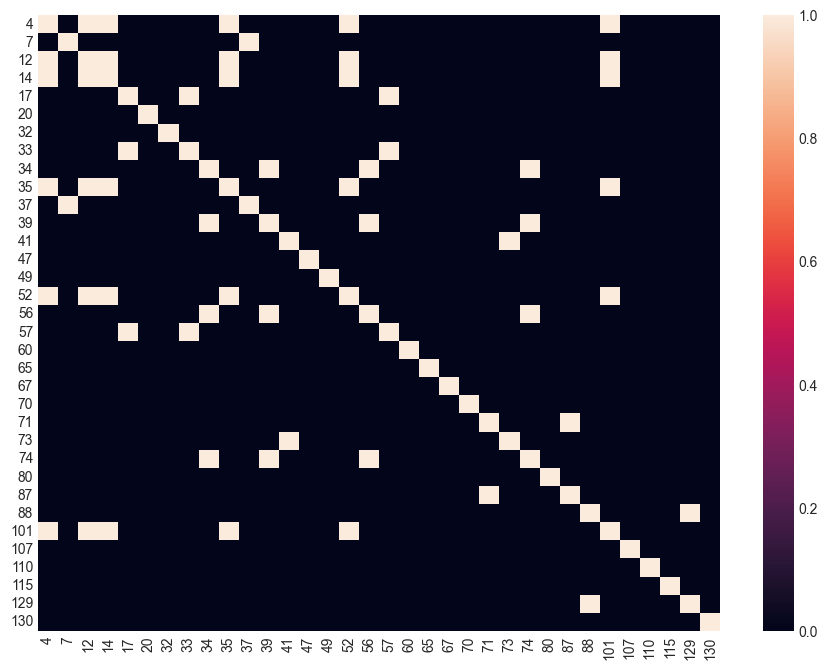

In [258]:
fig, ax = plt.subplots(1,1,figsize=(11,8))

sns.heatmap(duplicated_columns, ax=ax)

In [259]:
CleanTS.columns.shape

(133,)

In [260]:
features_to_be_removed = []
i=0
while i<CleanTS.columns.shape[0]:
    for j in range(i):
        if CleanTS[CleanTS.columns[i]].equals(CleanTS[CleanTS.columns[j]]):
            features_to_be_removed.append(CleanTS.columns[j])
    i+=1

In [261]:
pd.Series(features_to_be_removed).duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17    False
18    False
19    False
20     True
21     True
22    False
23    False
24    False
25     True
26     True
27     True
28     True
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [262]:
CleanTS.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-11-29 00:00:00,1.0,0.957031,0.0,0.0,0.0,47779408.0,0.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,39.0
2014-11-29 00:01:00,1.0,0.957031,0.0,0.0,0.0,47779408.0,0.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:02:00,1.0,0.957031,0.0,0.0,0.0,61194368.0,0.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:03:00,1.0,0.957031,0.0,0.0,0.0,55459888.0,0.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:04:00,1.0,0.957031,0.0,0.0,0.0,51647016.0,0.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0


In [263]:
which_to_be_dropped = pd.Series(features_to_be_removed).drop_duplicates(keep='first')
drop_duplicated_CleanTS = CleanTS.drop(which_to_be_dropped.values, axis=1)
drop_duplicated_CleanTS.head()

,0,1,2,3,5,8,10,11,13,16,...,123,124,125,126,127,128,129,130,131,132
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-11-29 00:00:00,1.0,0.957031,0.0,0.0,47779408.0,0.0,0.0,0.538314,0.832978,0.336904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,39.0
2014-11-29 00:01:00,1.0,0.957031,0.0,0.0,47779408.0,0.0,0.0,0.538314,0.832978,0.337124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:02:00,1.0,0.957031,0.0,0.0,61194368.0,0.0,0.0,0.538314,0.832978,0.337030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:03:00,1.0,0.957031,0.0,0.0,55459888.0,0.0,0.0,0.538314,0.832978,0.337186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
2014-11-29 00:04:00,1.0,0.957031,0.0,0.0,51647016.0,0.0,0.0,0.538314,0.832978,0.337061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0


20


<Axes: >

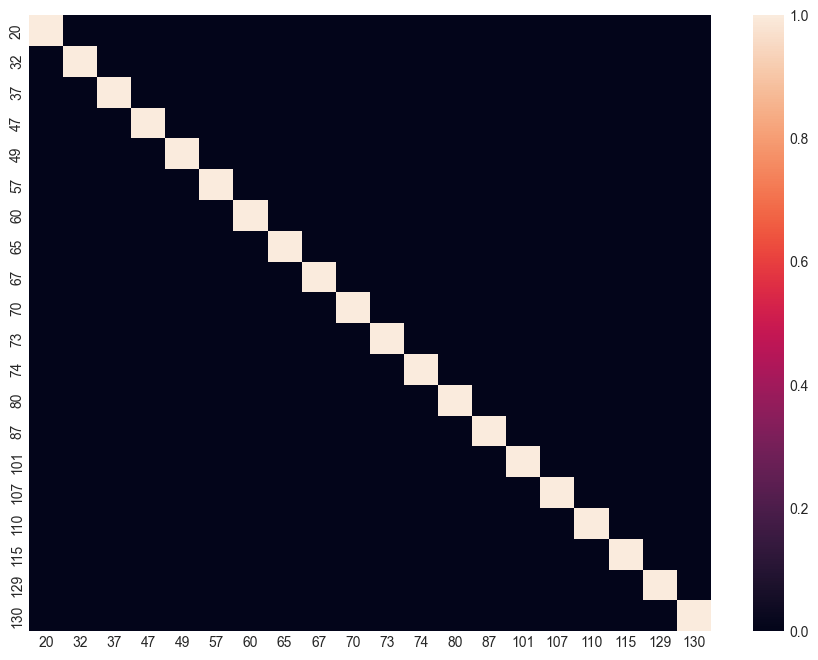

In [264]:
binary_features  = []
for x in [col for col in drop_duplicated_CleanTS.columns]:
    number_of_categories = CleanTS[x].nunique()
    if number_of_categories==2:
        binary_features.append(x)

print(len(binary_features))

duplicated_columns = []
for x in binary_features:
    x_feature_check_with_y = []
    for y in binary_features:
        if drop_duplicated_CleanTS[x].equals(drop_duplicated_CleanTS[y])==True:
            x_feature_check_with_y.append(1)
        else:
            x_feature_check_with_y.append(0)
    duplicated_columns.append(x_feature_check_with_y)

duplicated_columns = pd.DataFrame(duplicated_columns, columns=binary_features, index=binary_features)
fig, ax = plt.subplots(1,1,figsize=(11,8))

sns.heatmap(duplicated_columns, ax=ax)

In [265]:
# row 끼리는 중복이 없다.
drop_duplicated_CleanTS[drop_duplicated_CleanTS.duplicated(keep=False)==True]

,0,1,2,3,5,8,10,11,13,16,...,123,124,125,126,127,128,129,130,131,132
timestamp,,,,,,,,,,,,,,,,,,,,,


In [266]:
before_normalized = drop_duplicated_CleanTS.copy()
before_normalized.index = range(before_normalized.shape[0])
for i, c in enumerate(before_normalized.columns):
    plt.figure(figsize=(20, 5))
    plt.plot(before_normalized.index, before_normalized[c], linewidth=0.5)
    plt.axvspan(382465, 386902, color='red', alpha=0.5)
    plt.title(c)
    plt.savefig(f'data_feature/Before_Normalized/{c}.jpeg', format='jpeg')
    plt.close()

DB connection started : (incld/dx (MXBean(com.bea:Name=source09,Type=JDBCConnectionPoolRuntime).ConnectionsTotalCount))


(0.0, 200.0)

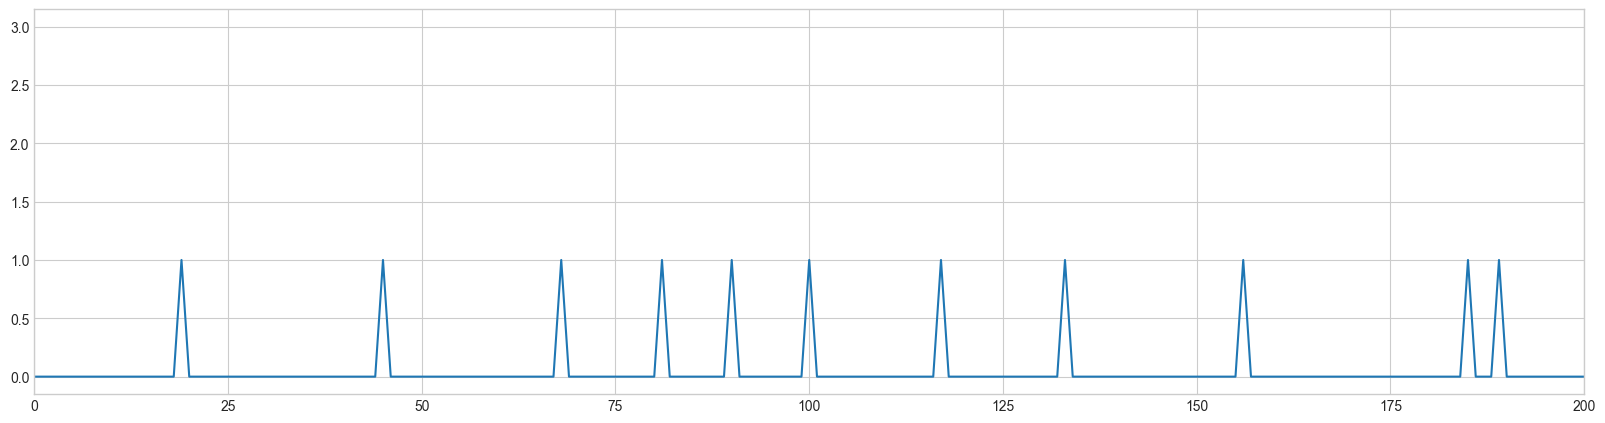

In [267]:
print(original_column_names[8])
plt.figure(figsize=(20, 5))
plt.plot(range(len(before_normalized[8])), before_normalized[8])
plt.xlim(0, 200)

# Standardization

In [334]:
scaler = StandardScaler()
#min_max_scaler = MinMaxScaler()

x = drop_duplicated_CleanTS.values
x_scaled = scaler.fit_transform(x)
dfNorm = pd.DataFrame(x_scaled, columns=drop_duplicated_CleanTS.columns, index=drop_duplicated_CleanTS.index)
print(dfNorm.shape)
dfNorm.head()

(397750, 112)


,0,1,2,3,5,8,10,11,13,16,...,123,124,125,126,127,128,129,130,131,132
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-11-29 00:00:00,0.046003,0.735996,0.000576,-0.187399,0.137430,-0.258003,-0.004176,0.886485,0.919966,-0.226330,...,-0.187895,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.075253,-4.291864
2014-11-29 00:01:00,0.046003,0.735996,0.000576,-0.187399,0.137430,-0.258003,-0.004176,0.886485,0.919966,-0.225058,...,-0.187895,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,-4.291864
2014-11-29 00:02:00,0.046003,0.735996,0.000576,-0.187399,0.176038,-0.258003,-0.004176,0.886485,0.919966,-0.225603,...,-0.187895,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,-4.291864
2014-11-29 00:03:00,0.046003,0.735996,0.000576,-0.187399,0.159534,-0.258003,-0.004176,0.886485,0.919966,-0.224694,...,-0.187895,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,-4.291864
2014-11-29 00:04:00,0.046003,0.735996,0.000576,-0.187399,0.148561,-0.258003,-0.004176,0.886485,0.919966,-0.225421,...,-0.187895,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,-4.291864


In [269]:
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# 플롯 스타일을 한 번만 설정
plt.style.use('seaborn-v0_8-whitegrid')

# 함수를 정의하여 각 열에 대한 플롯을 생성
def plot_column(i, c):
    plt.figure(figsize=(20, 5))
    plt.plot(dfNorm.index, dfNorm[c], linewidth=1)
    plt.axvspan('2015-09-22 07:28:00', '2015-09-25 09:26:00', color='red', alpha=0.1)
    plt.title(c)
    plt.savefig(f'data_feature/standard/{c}.jpeg', format='jpeg')
    plt.close()

# 정렬된 열 이름과 인덱스를 쌍으로 생성
columns_sorted = sorted(dfNorm.columns)
tasks = [(i, c) for i, c in enumerate(columns_sorted)]

# 멀티쓰레딩을 사용하여 병렬 처리
with ThreadPoolExecutor() as executor:
    executor.map(lambda p: plot_column(*p), tasks)

C:\Users\pc_ai\AppData\Local\Temp\ipykernel_5376\3018932135.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 5))


In [335]:
dfNorm['label'] = labels
dfNorm.shape

(397750, 113)

In [336]:
NoEvent = dfNorm[dfNorm['label'] == 0]
OnlyEvent = dfNorm[dfNorm['label'] == 1]
print(NoEvent.shape)
print(OnlyEvent.shape)

(393311, 113)
(4439, 113)


In [337]:
NoEvent.describe()

,0,1,2,3,5,8,10,11,13,16,...,124,125,126,127,128,129,130,131,132,label
count,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,...,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.000000,393311.0
mean,0.004309,0.028311,-0.000007,-0.000146,-0.000013,-0.001986,-0.000104,0.001118,0.021657,-0.033537,...,0.000036,-0.000006,-0.001986,-0.000110,0.000150,0.000036,0.000149,0.001706,-0.042883,0.0
std,1.004734,0.969258,1.005629,0.999624,1.002503,0.996064,1.000593,1.001380,0.984506,0.953850,...,1.005566,1.005629,0.996065,0.996034,1.005628,1.005629,1.005628,1.002432,0.920060,0.0
min,-2.104204,-3.064674,-238.346738,-0.187399,-22.943422,-0.258003,-83.509802,-1.671961,-2.757148,-1.527389,...,-33.966201,-210.206992,-0.257998,-39.219881,-0.013249,-0.003171,-0.013172,-0.255688,-4.291864,0.0
25%,-0.003973,-0.392868,0.000576,-0.187399,0.067159,-0.258003,-0.004176,-0.807124,-1.072161,-0.635899,...,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,-0.294873,0.0
50%,0.046003,0.407201,0.000576,-0.187399,0.152531,-0.258003,-0.004176,-0.116879,0.632319,-0.308680,...,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.255688,0.095078,0.0
75%,0.311722,0.790795,0.000576,-0.187399,0.182585,-0.258003,-0.004176,0.790233,0.785254,0.213779,...,-0.003229,0.000508,-0.257998,0.000286,-0.013249,-0.003171,-0.013172,-0.165471,0.485028,0.0
max,2.131100,0.801755,238.347890,5.336598,11.557853,11.583776,88.965544,3.295417,1.024497,3.583589,...,248.506322,210.208008,11.583511,62.312604,76.361715,315.335536,75.917671,35.560646,3.799607,0.0


In [338]:
OnlyEvent.describe()

,0,1,2,3,5,8,10,11,13,16,...,124,125,126,127,128,129,130,131,132,label
count,4439.000000,4439.000000,4.439000e+03,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,...,4439.000000,4.439000e+03,4439.000000,4439.000000,4.439000e+03,4.439000e+03,4.439000e+03,4439.000000,4.439000e+03,4439.0
mean,-0.381754,-2.508496,5.761914e-04,0.012953,0.001173,0.175937,0.009247,-0.099054,-1.918902,2.971452,...,-0.003229,5.081649e-04,0.175933,0.009787,-1.324921e-02,-3.171225e-03,-1.317216e-02,-0.151153,3.799607e+00,1.0
std,0.109116,0.025714,1.084324e-19,1.032882,0.745813,1.290483,0.946137,0.863551,0.029388,0.245971,...,0.105419,1.084324e-19,1.290454,1.304595,1.734919e-18,8.674595e-19,1.734919e-18,0.738805,4.441392e-16,0.0
min,-0.715987,-2.539628,5.761914e-04,-0.187399,-8.831913,-0.258003,-33.798416,-0.896928,-1.957564,2.705552,...,-4.145055,5.081649e-04,-0.257998,-27.703511,-1.324921e-02,-3.171225e-03,-1.317216e-02,-0.255688,3.799607e+00,1.0
25%,-0.512312,-2.534491,5.761914e-04,-0.187399,0.110152,-0.258003,-0.004176,-0.838890,-1.943468,2.760634,...,-0.003229,5.081649e-04,-0.257998,0.000286,-1.324921e-02,-3.171225e-03,-1.317216e-02,-0.255688,3.799607e+00,1.0
50%,-0.292156,-2.517024,5.761914e-04,-0.187399,0.117946,-0.258003,-0.004176,-0.565180,-1.932559,2.836985,...,-0.003229,5.081649e-04,-0.257998,0.000286,-1.324921e-02,-3.171225e-03,-1.317216e-02,-0.255688,3.799607e+00,1.0
75%,-0.292156,-2.484144,5.761914e-04,-0.187399,0.137377,-0.258003,-0.004176,0.967929,-1.887290,3.256098,...,-0.003229,5.081649e-04,-0.257998,0.000286,-1.324921e-02,-3.171225e-03,-1.317216e-02,-0.255688,3.799607e+00,1.0
max,-0.292156,-2.467704,5.761914e-04,5.336598,8.881304,7.636516,31.696483,2.035062,-1.870074,3.555594,...,4.138597,5.081649e-04,7.636341,24.778272,-1.324921e-02,-3.171225e-03,-1.317216e-02,30.869337,3.799607e+00,1.0


In [362]:
# for column in dfNorm.columns:
#     sns.histplot(dfNorm[column], kde=True, stat="density", common_norm=False)
# plt.show()

In [363]:
# # Viz the distribution of each feature: no-event vs event
# for col in dfNorm.columns:
#     plt.figure()
#     sns.histplot(OnlyEvent[col], label="Anomaly", kde=True, stat="density").set_title(col)
#     sns.histplot(NoEvent[col], label="Normal", kde=True, stat="density")
#     plt.legend()
#     plt.savefig(f'data_feature/histplot/{col}.jpeg', format='jpeg')
#     plt.close()

In [365]:

print(dfNorm.shape)
print(NoEvent.shape)
print(OnlyEvent.shape)


Cols = list(dfNorm)[:-1] 
# dfNorm = dfNorm[Cols]
dfNorm = dfNorm[Cols]
NoEvent = NoEvent[Cols]
OnlyEvent = OnlyEvent[Cols]

print(dfNorm.shape)
print(dfNorm.shape)
print(NoEvent.shape)
print(OnlyEvent.shape)

(397750, 113)
(397750, 113)
(393311, 113)
(4439, 112)
(397750, 113)
(397750, 112)
(393311, 112)
(4439, 112)


1 hour rolling

In [366]:
rolled_dfs = cleand_dfNorm.resample('1h').mean().dropna()
rolled_labels = labels.resample('1h').mean().dropna()

# 정상 데이터와 이상 데이터가 겹쳐서 rolling되는 부분을 삭제한다.
# 라벨이 0 또는 1인 row만 고르기 위한 index 찾기
result = (rolled_labels == 0) | (rolled_labels == 1)

# True인 값의 인덱스를 가져옵니다.
true_indices = result[result].index
rolled_dfs = rolled_dfs.loc[true_indices]
rolled_labels = rolled_labels.loc[true_indices]

KeyError: "[Timestamp('2014-11-29 00:00:00'), Timestamp('2014-11-29 01:00:00'), Timestamp('2014-11-29 02:00:00'), Timestamp('2014-11-29 03:00:00'), Timestamp('2014-11-29 04:00:00'), Timestamp('2014-11-29 05:00:00'), Timestamp('2014-11-29 06:00:00'), Timestamp('2014-11-29 07:00:00'), Timestamp('2014-11-29 08:00:00'), Timestamp('2014-11-29 09:00:00'), Timestamp('2014-11-29 10:00:00'), Timestamp('2014-11-29 11:00:00'), Timestamp('2014-11-29 12:00:00'), Timestamp('2014-11-29 13:00:00'), Timestamp('2014-11-29 14:00:00'), Timestamp('2014-11-29 15:00:00'), Timestamp('2014-11-29 16:00:00'), Timestamp('2014-11-29 17:00:00'), Timestamp('2014-11-29 18:00:00'), Timestamp('2014-11-29 19:00:00'), Timestamp('2014-11-29 20:00:00'), Timestamp('2014-11-29 21:00:00'), Timestamp('2014-11-29 22:00:00'), Timestamp('2014-11-29 23:00:00'), Timestamp('2014-11-30 00:00:00'), Timestamp('2014-11-30 01:00:00'), Timestamp('2014-11-30 02:00:00'), Timestamp('2014-11-30 03:00:00'), Timestamp('2014-11-30 04:00:00'), Timestamp('2014-11-30 05:00:00'), Timestamp('2014-11-30 06:00:00'), Timestamp('2014-11-30 07:00:00'), Timestamp('2014-11-30 08:00:00'), Timestamp('2014-11-30 09:00:00'), Timestamp('2014-11-30 10:00:00'), Timestamp('2014-11-30 11:00:00'), Timestamp('2014-11-30 12:00:00'), Timestamp('2014-11-30 13:00:00'), Timestamp('2014-11-30 14:00:00'), Timestamp('2014-11-30 15:00:00'), Timestamp('2014-11-30 16:00:00'), Timestamp('2014-11-30 17:00:00'), Timestamp('2014-11-30 18:00:00'), Timestamp('2014-11-30 19:00:00'), Timestamp('2014-11-30 20:00:00'), Timestamp('2014-11-30 21:00:00'), Timestamp('2014-11-30 22:00:00'), Timestamp('2014-11-30 23:00:00'), Timestamp('2014-12-01 00:00:00'), Timestamp('2014-12-01 01:00:00'), Timestamp('2014-12-01 02:00:00'), Timestamp('2014-12-01 03:00:00'), Timestamp('2014-12-01 04:00:00'), Timestamp('2014-12-01 05:00:00'), Timestamp('2014-12-01 06:00:00'), Timestamp('2014-12-01 07:00:00'), Timestamp('2014-12-01 08:00:00'), Timestamp('2014-12-01 09:00:00'), Timestamp('2014-12-01 10:00:00'), Timestamp('2014-12-01 11:00:00'), Timestamp('2014-12-01 12:00:00')] not in index"

In [278]:
rolled_labels.sum()

73.0

In [279]:
# 연속적인 이상을 순간적인 이상으로 바꾸는 코드

import pandas as pd
import numpy as np

# 결과를 저장할 리스트
result_A = []
result_B = []

# 상태 추적 변수
in_anomaly = False
anomaly_start = None

# 순회하면서 평균 계산
for i in range(len(rolled_labels)):
    if rolled_labels.iloc[i] == 1 and not in_anomaly:   # 이상이고, 상태 추적 변수가 Fasle 이면 -> 연속적인 이상이 여기서부터 시작된다. 
        in_anomaly = True
        anomaly_start = i
    elif rolled_labels.iloc[i] == 0 and in_anomaly:     # 정상이고, 상태 추적 변수가 True 이면  -> 연속적인 이상이 끝났다.
        in_anomaly = False
        anomaly_end = i
        mean_A = rolled_dfs.iloc[anomaly_start:anomaly_end].mean()         # anomaly_start ~ anomaly_end : 연속적인 이상 발생 구간
        mean_B = rolled_labels.iloc[anomaly_start:anomaly_end].mean()
        result_A.append(mean_A)
        result_B.append(mean_B)

    if rolled_labels.iloc[i] == 0:          # 정상이면
        result_A.append(rolled_dfs.iloc[i])
        result_B.append(rolled_labels.iloc[i])

# B가 1로 끝나는 경우 마지막 이상 영역 평균 추가
if in_anomaly:
    mean_A = rolled_dfs.iloc[anomaly_start:].mean()
    mean_B = rolled_labels.iloc[anomaly_start:].mean()
    result_A.append(mean_A)
    result_B.append(mean_B)

# 결과를 새로운 Series로 변환
rolled_one_dfs = pd.DataFrame(result_A, index=range(len(result_A)))
rolled_one_labels = pd.Series(result_B, index=range(len(result_B)))

In [280]:
rolled_one_dfs

,0,1,2,3,5,8,10,11,13,16,...,123,124,125,126,127,128,129,130,131,132
0,0.046003,0.735996,0.000576,-0.187399,0.046402,-0.126428,-0.004176,0.870096,0.920114,-0.231457,...,-0.187895,-0.003229,0.000508,-0.126425,-0.029696,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
1,0.046003,0.735996,0.000576,-0.187399,0.054564,0.070935,-0.004176,0.820884,0.920237,-0.251711,...,-0.187895,-0.003229,0.000508,0.070933,-0.027600,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
2,0.046003,0.735996,0.000576,-0.187399,-0.062064,-0.126428,-0.004176,0.757523,0.920377,-0.273044,...,-0.187895,-0.003229,0.000508,-0.126425,-0.052389,-0.013249,-0.003171,-0.013172,-0.230127,-4.291864
3,0.046003,0.735996,0.000576,-0.187399,-0.043519,0.005147,-0.004176,0.706054,0.920387,-0.281454,...,-0.187895,-0.003229,0.000508,0.005147,-0.047073,-0.013249,-0.003171,-0.013172,-0.222608,-4.291864
4,0.046003,0.735996,0.000576,-0.187399,0.077912,-0.060640,-0.004176,0.653728,0.920271,-0.294307,...,-0.187895,-0.003229,0.000508,-0.060639,-0.015244,-0.013249,-0.003171,-0.013172,-0.200054,-4.291864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,-0.916794,0.341442,0.000576,-0.187399,0.001644,0.202510,-0.004176,1.608352,-1.085970,0.089827,...,-0.187895,-0.003229,0.000508,0.202506,0.005372,-0.013249,-0.003171,-0.013172,-0.246666,0.777491
6565,-0.916794,0.341442,0.000576,-0.187399,0.013831,0.202510,-0.004176,1.617603,-1.085959,0.084576,...,-0.187895,-0.003229,0.000508,0.202506,-0.030603,-0.013249,-0.003171,-0.013172,-0.216594,0.777491
6566,-0.916794,0.341442,0.000576,-0.187399,0.008027,0.070935,-0.004176,1.537982,-1.085759,0.075654,...,-0.187895,-0.003229,0.000508,0.070933,-0.124785,-0.013249,-0.003171,-0.013172,-0.216594,0.777491
6567,-0.916794,0.341442,0.000576,-0.187399,0.008419,0.202510,-0.004176,1.480227,-1.085753,0.074123,...,-0.187895,-0.003229,0.000508,0.202506,0.102551,-0.013249,-0.003171,-0.013172,-0.243659,0.777491


In [281]:
rolled_one_labels[rolled_one_labels == 1]

6385    1.0
dtype: float64

In [282]:
rolled_one_dfs

,0,1,2,3,5,8,10,11,13,16,...,123,124,125,126,127,128,129,130,131,132
0,0.046003,0.735996,0.000576,-0.187399,0.046402,-0.126428,-0.004176,0.870096,0.920114,-0.231457,...,-0.187895,-0.003229,0.000508,-0.126425,-0.029696,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
1,0.046003,0.735996,0.000576,-0.187399,0.054564,0.070935,-0.004176,0.820884,0.920237,-0.251711,...,-0.187895,-0.003229,0.000508,0.070933,-0.027600,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
2,0.046003,0.735996,0.000576,-0.187399,-0.062064,-0.126428,-0.004176,0.757523,0.920377,-0.273044,...,-0.187895,-0.003229,0.000508,-0.126425,-0.052389,-0.013249,-0.003171,-0.013172,-0.230127,-4.291864
3,0.046003,0.735996,0.000576,-0.187399,-0.043519,0.005147,-0.004176,0.706054,0.920387,-0.281454,...,-0.187895,-0.003229,0.000508,0.005147,-0.047073,-0.013249,-0.003171,-0.013172,-0.222608,-4.291864
4,0.046003,0.735996,0.000576,-0.187399,0.077912,-0.060640,-0.004176,0.653728,0.920271,-0.294307,...,-0.187895,-0.003229,0.000508,-0.060639,-0.015244,-0.013249,-0.003171,-0.013172,-0.200054,-4.291864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,-0.916794,0.341442,0.000576,-0.187399,0.001644,0.202510,-0.004176,1.608352,-1.085970,0.089827,...,-0.187895,-0.003229,0.000508,0.202506,0.005372,-0.013249,-0.003171,-0.013172,-0.246666,0.777491
6565,-0.916794,0.341442,0.000576,-0.187399,0.013831,0.202510,-0.004176,1.617603,-1.085959,0.084576,...,-0.187895,-0.003229,0.000508,0.202506,-0.030603,-0.013249,-0.003171,-0.013172,-0.216594,0.777491
6566,-0.916794,0.341442,0.000576,-0.187399,0.008027,0.070935,-0.004176,1.537982,-1.085759,0.075654,...,-0.187895,-0.003229,0.000508,0.070933,-0.124785,-0.013249,-0.003171,-0.013172,-0.216594,0.777491
6567,-0.916794,0.341442,0.000576,-0.187399,0.008419,0.202510,-0.004176,1.480227,-1.085753,0.074123,...,-0.187895,-0.003229,0.000508,0.202506,0.102551,-0.013249,-0.003171,-0.013172,-0.243659,0.777491


In [283]:
for i, c in enumerate(rolled_one_dfs.columns):
    plt.figure(figsize=(20, 5))
    plt.plot(rolled_one_dfs.index, rolled_one_dfs[c], linewidth=0.5)
    plt.axvspan(6385, 6385, color='red', alpha=0.5)
    plt.title(c)
    plt.savefig(f'data_feature/rolling/{c}.jpeg', format='jpeg')
    plt.close()

In [284]:
rolled_one_labels.sum()

1.0

In [285]:
len(rolled_one_labels), len(rolled_one_dfs)

(6569, 6569)

In [313]:
pre_data = dict()

pre_data = pd.concat((rolled_one_labels, rolled_one_dfs), axis=1, ignore_index=True)
pre_data.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.0,0.046003,0.735996,0.000576,-0.187399,0.046402,-0.126428,-0.004176,0.870096,0.920114,...,-0.187895,-0.003229,0.000508,-0.126425,-0.029696,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
1,0.0,0.046003,0.735996,0.000576,-0.187399,0.054564,0.070935,-0.004176,0.820884,0.920237,...,-0.187895,-0.003229,0.000508,0.070933,-0.027600,-0.013249,-0.003171,-0.013172,-0.213587,-4.291864
2,0.0,0.046003,0.735996,0.000576,-0.187399,-0.062064,-0.126428,-0.004176,0.757523,0.920377,...,-0.187895,-0.003229,0.000508,-0.126425,-0.052389,-0.013249,-0.003171,-0.013172,-0.230127,-4.291864
3,0.0,0.046003,0.735996,0.000576,-0.187399,-0.043519,0.005147,-0.004176,0.706054,0.920387,...,-0.187895,-0.003229,0.000508,0.005147,-0.047073,-0.013249,-0.003171,-0.013172,-0.222608,-4.291864
4,0.0,0.046003,0.735996,0.000576,-0.187399,0.077912,-0.060640,-0.004176,0.653728,0.920271,...,-0.187895,-0.003229,0.000508,-0.060639,-0.015244,-0.013249,-0.003171,-0.013172,-0.200054,-4.291864


In [321]:
# IQR 계산 및 이상치 제거 함수
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound))
    return df_filtered

# 이상치 제거
columns = pre_data.columns  # 처리할 컬럼 목록
cleand_NoEvent = remove_outliers_iqr(NoEvent, columns)

# 보간(interpolation)으로 빈 구간 채우기
df_interpolated = cleand_NoEvent.interpolate(method='linear')


In [323]:
df_cleaned.describe()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
count,638.0,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,6.380000e+02,638.000000,638.000000,...,6.380000e+02,6.380000e+02,6.380000e+02,638.000000,638.000000,6.380000e+02,638.000000,638.000000,638.000000,638.000000
mean,0.0,0.140911,-0.195582,5.761914e-04,-1.873993e-01,0.002854,-0.091678,-4.176342e-03,-0.622191,0.191954,...,-1.878946e-01,-3.228770e-03,5.081649e-04,-0.091676,-0.009076,-1.324921e-02,-0.003171,-0.013172,-0.199725,0.247880
std,0.0,0.252886,0.757675,1.085053e-19,2.777735e-17,0.017007,0.082056,1.736085e-18,0.738191,0.732764,...,2.777735e-17,4.340211e-19,1.085053e-19,0.082054,0.021542,1.736085e-18,0.000000,0.000000,0.042506,0.357799
min,0.0,-0.003973,-1.888887,5.761914e-04,-1.873993e-01,-0.060001,-0.258003,-4.176342e-03,-1.665842,-2.038156,...,-1.878946e-01,-3.228770e-03,5.081649e-04,-0.257998,-0.096978,-1.324921e-02,-0.003171,-0.013172,-0.246666,-0.977286
25%,0.0,0.046003,-0.486027,5.761914e-04,-1.873993e-01,-0.003448,-0.126428,-4.176342e-03,-1.247090,-0.050145,...,-1.878946e-01,-3.228770e-03,5.081649e-04,-0.126425,-0.016108,-1.324921e-02,-0.003171,-0.013172,-0.224112,0.095078
50%,0.0,0.046003,-0.239430,5.761914e-04,-1.873993e-01,0.002806,-0.060640,-4.176342e-03,-0.847506,0.507645,...,-1.878946e-01,-3.228770e-03,5.081649e-04,-0.060639,-0.002772,-1.324921e-02,-0.003171,-0.013172,-0.213587,0.095078
75%,0.0,0.046003,0.494879,5.761914e-04,-1.873993e-01,0.008237,-0.060640,-4.176342e-03,-0.080266,0.730325,...,-1.878946e-01,-3.228770e-03,5.081649e-04,-0.060639,0.002378,-1.324921e-02,-0.003171,-0.013172,-0.192536,0.485028
max,0.0,1.190250,0.796275,5.761914e-04,-1.873993e-01,0.061416,0.268298,-4.176342e-03,1.706237,0.898700,...,-1.878946e-01,-3.228770e-03,5.081649e-04,0.268292,0.081333,-1.324921e-02,-0.003171,-0.013172,0.054058,1.557392


Text(0.5, 1.0, 'Max value of features')

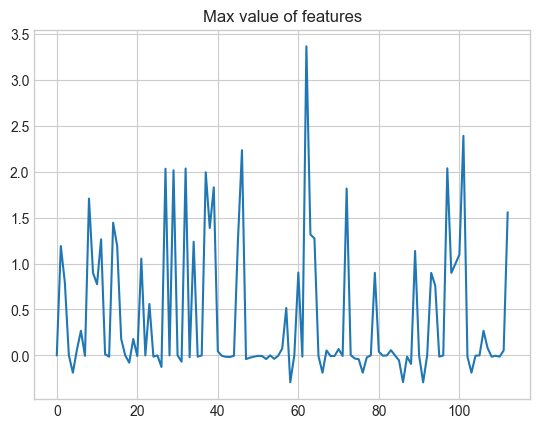

In [324]:
plt.plot(df_cleaned.max())
plt.title('Max value of features')

Text(0.5, 1.0, 'Min value of features')

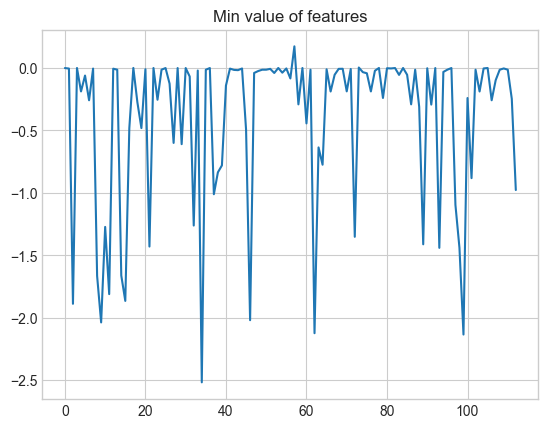

In [325]:
plt.plot(df_cleaned.min())
plt.title('Min value of features')

## 전처리 한 데이터 csv파일로 저장

In [327]:
df_cleaned

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
77,0.0,0.046003,-0.157232,0.000576,-0.187399,0.029200,-0.060640,-0.004176,0.423734,0.516803,...,-0.187895,-0.003229,0.000508,-0.060639,-0.035708,-0.013249,-0.003171,-0.013172,-0.082771,1.557392
96,0.0,0.046003,0.237323,0.000576,-0.187399,-0.022110,-0.060640,-0.004176,0.850949,0.675792,...,-0.187895,-0.003229,0.000508,-0.060639,-0.007341,-0.013249,-0.003171,-0.013172,-0.213587,1.557392
100,0.0,0.046003,0.253763,0.000576,-0.187399,0.059697,-0.060640,-0.004176,0.897455,0.682710,...,-0.187895,-0.003229,0.000508,-0.060639,0.000947,-0.013249,-0.003171,-0.013172,-0.216594,1.557392
101,0.0,0.046003,0.253763,0.000576,-0.187399,-0.053221,-0.192216,-0.004176,0.900055,0.682699,...,-0.187895,-0.003229,0.000508,-0.192211,0.002236,-0.013249,-0.003171,-0.013172,-0.131639,1.557392
111,0.0,0.046003,0.281162,0.000576,-0.187399,0.038754,-0.192216,-0.004176,1.117442,0.723338,...,-0.187895,-0.003229,0.000508,-0.192211,-0.000448,-0.013249,-0.003171,-0.013172,-0.212083,1.557392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.046003,-1.828608,0.000576,-0.187399,-0.009902,0.136723,-0.004176,-0.927857,-0.594553,...,-0.187895,-0.003229,0.000508,0.136719,-0.049524,-0.013249,-0.003171,-0.013172,-0.207572,-0.002410
4650,0.0,0.046003,-1.828608,0.000576,-0.187399,-0.030957,0.202510,-0.004176,-1.131269,-0.593258,...,-0.187895,-0.003229,0.000508,0.202506,-0.038086,-0.013249,-0.003171,-0.013172,-0.227119,-0.002410
4668,0.0,0.046003,-1.801209,0.000576,-0.187399,0.002855,0.202510,-0.004176,-1.573260,-0.631434,...,-0.187895,-0.003229,0.000508,0.202506,0.006419,-0.013249,-0.003171,-0.013172,-0.239148,-0.002410
4694,0.0,0.046003,-1.494333,0.000576,-0.187399,-0.015505,0.005147,-0.004176,-0.567329,-0.061014,...,-0.187895,-0.003229,0.000508,0.005147,-0.035518,-0.013249,-0.003171,-0.013172,-0.224112,0.680003


In [328]:
# 각 태그에 대한 데이터프레임을 CSV 파일로 저장
df_cleaned.to_csv('./Preprocessed_data2/lphost06_wls1.csv', index=False)
print(f"Saved lphost06_wls1, {df_cleaned.shape}")

Saved lphost06_wls1, (638, 113)


In [329]:
# # 빈 딕셔너리 생성
# rolled_one_dfs = {}

# # 각 태그에 대한 CSV 파일을 읽어와서 딕셔너리에 저장
# for key in sub_dfs.keys():
#     csv_filename = f'./Preprocessed_data2/{key}.csv'
#     df = pd.read_csv(csv_filename)
#     rolled_one_dfs[key] = df
#     print(f"Loaded {csv_filename} into rolled_one_dfs[{key}]")

In [187]:
# rolled_one_labels['lphost06_wls1'].unique()

array([0., 1.])

In [188]:
# features_name = rolled_one_dfs['lphost06_wls1'].columns
# rolled_one_dfs['lphost06_wls1'].columns = range(rolled_one_dfs['lphost06_wls1'].shape[1]) # column name을 index로 변경

In [189]:
# print(rolled_one_dfs['lphost06_wls1'].shape)
# rolled_one_dfs['lphost06_wls1'].head()

(6569, 134)


,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,0.0,0.0,0.273543,0.0,0.0,0.0,-0.920049,0.0,0.0,0.131575,...,0.0,0.0,0.0,0.131572,-0.029981,0.0,0.0,0.0,0.466667,-5.625
1,0.0,0.0,0.273543,0.0,0.0,0.0,-0.848911,0.0,0.0,0.328938,...,0.0,0.0,0.0,0.328931,-0.027885,0.0,0.0,0.0,0.466667,-5.625
2,0.0,0.0,0.273543,0.0,0.0,0.0,-1.865353,0.0,0.0,0.131575,...,0.0,0.0,0.0,0.131572,-0.052674,0.0,0.0,0.0,0.283333,-5.625
3,0.0,0.0,0.273543,0.0,0.0,0.0,-1.703728,0.0,0.0,0.263151,...,0.0,0.0,0.0,0.263145,-0.047358,0.0,0.0,0.0,0.366667,-5.625
4,0.0,0.0,0.273543,0.0,0.0,0.0,-0.645432,0.0,0.0,0.197363,...,0.0,0.0,0.0,0.197358,-0.015529,0.0,0.0,0.0,0.616667,-5.625
